In [ ]:
import sys; sys.path.insert(0,'..')

In [ ]:
import datetime
import glob
import json
import os

import numpy as np
import pandas as pd

In [ ]:
from flight_tables.heathrow_parsing import extract_batch_heathrow
from flight_tables.flight_parsing import ParsedFlights

# Setup

In [ ]:
file_pattern = '2020*Z.json' #'2020-01-29Z.json'
root_dir = os.path.dirname(os.getcwd()) # parent of cwd
data_dir = os.path.join(root_dir, 'data\\heathrow_data\\')
path_pattern = os.path.join(data_dir, file_pattern)

In [ ]:
# Files to Load
files = glob.glob(path_pattern) # A List of file paths
print(f"{len(files)} files found")

# Load Batch

In [ ]:
def file_to_df(path):
    """Load a Heathrow Flights JSON into a Dataframe.
    
    Parameters:
        path (str): path of JSON file you want to load.
    Returns: 
        heathrow_df (pd.DataFrame): Dataframe created after parsing the raw file.
    """    
    with open(path, 'r') as f:
        heathrow_raw_dict = json.load(f)

    batch_info = extract_batch_heathrow(heathrow_raw_dict)

    parsed_flights = ParsedFlights(batch_info)

    heathrow_df = parsed_flights.to_dataframe()
    
    return heathrow_df

In [ ]:
def batch_load_heathrow_json(file_paths):
    """Load a list of heathrow JSON files into a single DataFrame.
    
    Parameters (list): File path strings of the JSON files you want to load
    Returns (pd.DataFrame): Single DataFrame with all the files you loaded.
    """
    
    
    flight_dataframes = []

    for file in files:
        temp_df = file_to_df(file)
        flight_dataframes.append(temp_df)

    df = pd.concat(flight_dataframes)
    
    return df

In [ ]:
# Takes some time if loading many files... (consider adding progress bar / or ask user before loading)
#df = batch_load_heathrow_json(files)

# Pickling
After the first time you can save jsons as dataframe pickle and load from there.

In [ ]:
#pd.to_pickle(df, './all_flights.pkl') # Saves to cwd (Notebooks directory)

In [ ]:
df = pd.read_pickle('all_flights.pkl')

# Dataframe Preparation
* Drop Duplicates
* Drop Flights which are not the primary Flight ID

In [ ]:
# Convert Delay Mins to Numeric
## Was object because cancelled flights return None. Consider core code change.
df.delay_mins = pd.to_numeric(df.delay_mins)

In [ ]:
# Delete Duplicates
df.drop_duplicates(inplace=True) 

In [ ]:
#Duplicate Analysis:
#df.loc[df.duplicated()] # Show duplicates
#df.loc[(df.delay_mins==16) & (df.flight_id=='BR068')] # Find specific Duplicates
#assert df.duplicated().any()==False, "Duplicated Entries found in Table."

In [ ]:
# Drop Alternative flight IDs
df = df.loc[df.code_share != 'alt_code']

### Validation

In [ ]:
# Check number of dates matches number of files
dates_count = len(df.scheduled_datetime.dt.date.unique())
assert dates_count == len(files), \
    f"Number of files doesn't match number of dates. \n\t You have {len(files)} files but data for {dates_count} dates."

# Analysis

In [ ]:
# Filter out Cancelled
departed_df = df.loc[df.status=="Departed"]

In [ ]:
df = departed_df

### Daily Departures

In [ ]:
# Note Storm Ciara 9th Feb
title = "Heathrow Daily Departures"
xlabel = "Date"
ylabel = "Flights per Day"
ax = df.groupby([df['actual_datetime'].dt.date]).count().flight_id.plot(figsize=[18,5])
ax.set(xlabel=xlabel,ylabel=ylabel,title=title);

In [ ]:
# Note how 16th IT Failure gave Delay spike (but not departures)
title = "Heathrow Daily Median Delay"
xlabel = "Date"
ylabel = "Median Delay (mins)"
ax = df.delay_mins.groupby([df['actual_datetime'].dt.date]).median().plot(figsize=[18,5])
ax.set(xlabel=xlabel,ylabel=ylabel,title=title);

In [ ]:
# Note how 16th IT Failure gave Delay spike (but not departures)
title = "Heathrow Daily Average Delay"
xlabel = "Date"
ylabel = "Median Delay (mins)"
ax = df.delay_mins.groupby([df['actual_datetime'].dt.date]).mean().plot(figsize=[18,5])
ax.set(xlabel=xlabel,ylabel=ylabel,title=title);

In [ ]:
# Dublin Delay Average
a = df.loc[df.destination=='DUB']
a.groupby(a.scheduled_datetime.dt.date).mean().delay_mins.plot(figsize=[18,5])

In [ ]:
# Wip plot dub & all mean delays by day
# All Series
all_sr = df.delay_mins.groupby([df['actual_datetime'].dt.date]).mean()
# Dub sr
a = df.loc[df.destination=='DUB']
dub_sr = a.groupby(a.scheduled_datetime.dt.date).mean().delay_mins

import matplotlib.

In [ ]:
# Dublin delay ave by id
dub_df = df.loc[df.destination=='DUB']
a = dub_df.groupby([dub_df.flight_id]).mean()

In [ ]:
# Dublin ID Count

In [ ]:
b = dub_df.groupby(dub_df.flight_id).count().iloc[:,0]

In [ ]:
c = dub_df.scheduled_datetime.groupby(dub_df.flight_id).min()
c = c.dt.time

In [ ]:
delay_by_time = pd.concat([a, b, c], axis=1).sort_values(by='scheduled_datetime')
#delay_by_time.reset_index()
#delay_by_time.set_index('scheduled_datetime')
delay_by_time

In [ ]:
mid = 'EI165'
df.loc[df.flight_id == mid]

In [ ]:
a.sort_values(by='delay_mins', ascending=False)

In [ ]:
df.loc[df.flight_id == 'BA828']

In [ ]:
# By Destination
* Frequency
* Delay
* Weekly Pattern (delay pattern)

In [ ]:
# Country Mapping
## Is this in the payload maybe?

In [ ]:
df.destination.mode()

In [ ]:
df.delay_mins.groupby(df["actual_datetime"].dt.month).mode()

In [ ]:
datetime.datetime.now().weekday()

In [ ]:
df.scheduled_datetime.dt.dayofweek.unique()

In [ ]:
fri_dub_df = df.loc[(df.scheduled_datetime.dt.dayofweek==4) & (df.destination=='DUB')]

In [ ]:
fri_dub_df.flight_id.unique()

In [ ]:
fri_dub_df.loc[fri_dub_df.flight_id == 'BA836'].delay_mins

In [ ]:
fri_dub_df.loc[fri_dub_df.flight_id == 'EI151'].delay_mins

In [ ]:
pd.tonumfri_dub_df.delay_mins.

# Delay By Time of Day

In [ ]:
df.head()

In [ ]:
df.groupby([df.scheduled_datetime.dt.hour]).mean().delay_mins.plot(figsize=[18,5])

In [ ]:
df.groupby([df.scheduled_datetime.dt.time]).mean().delay_mins.plot(figsize=[18,5])

In [ ]:
df.groupby([df.scheduled_datetime.dt.hour, df.scheduled_datetime.dt.minute]).mean().delay_mins.plot(figsize=[18,5])

In [ ]:
z = df.groupby([df.scheduled_datetime.dt.hour, df.scheduled_datetime.dt.minute]).mean().delay_mins

# Notice; an average Heathrow flight leaves > 20 mins late...
z.loc[z>-200].plot(figsize=[18,5])

In [ ]:
z.loc[:,:,]

In [ ]:
df.groupby([df.scheduled_datetime.dt.hour]).mean().delay_mins.plot(figsize=[18,5])

In [ ]:
df.groupby([df.scheduled_datetime.dt.time]).mean().delay_mins.plot(figsize=[18,5])

In [ ]:
df.scheduled_datetime.dt.minute//30

In [ ]:
df.delay_mins.min()

In [ ]:
# Is this a bug in my logic?
df.loc[df.delay_mins<-1000]

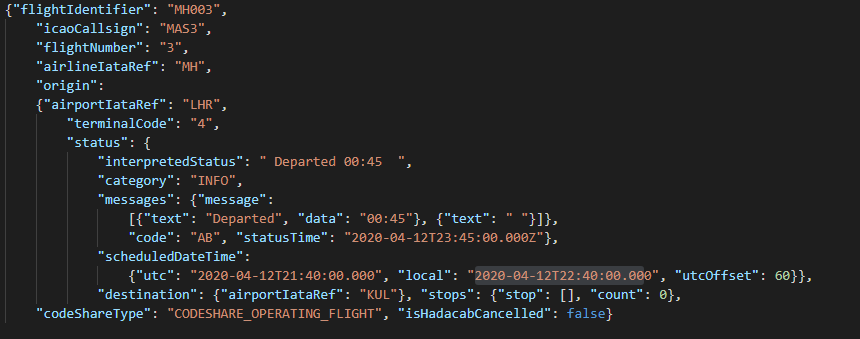